In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import pickle
import numpy
import matplotlib.pyplot as plt
import sys
dataPath = '/Users/omojumiller/mycode/MachineLearningNanoDegree/IntroToMachineLearning/'
sys.path.append(dataPath+'tools/')

from feature_format import featureFormat, targetFeatureSplit

In [3]:
### load in the dict of dicts containing all the data on each person in the dataset
data_dict = pickle.load( open('cleaned_dataset.pkl', "r") )


In [4]:
poi  = "poi"

feature_1 = "salary"
feature_2 = "exercised_stock_options"
feature_3 = "restricted_stock"

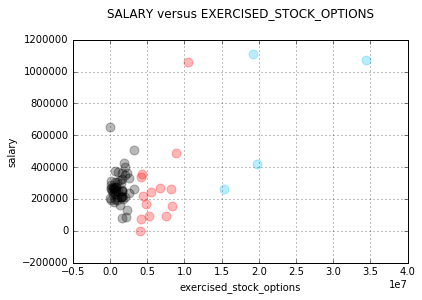

In [5]:
### the input features we want to use 
### can be any key in the person-level dictionary (salary, director_fees, etc.) 

features_list = [poi, feature_2, feature_1] #
data = featureFormat(data_dict, features_list, remove_any_zeroes=True)
_, finance_features = targetFeatureSplit( data )

### cluster here; create predictions of the cluster labels
### for the data and store them to a list called pred

from sklearn.cluster import KMeans
km = KMeans(n_clusters=3, n_init=100, max_iter=500)
km.fit(finance_features)
pred = km.predict(finance_features)

colors = ["k", "deepskyblue", "r", "m", "k"]

for i, point in enumerate(finance_features):
    x = point[0]
    y = point[1]
    plt.scatter(x, y, color = colors[pred[i]], s=80, marker = 'o', alpha = 0.28)
    
plt.xlabel(features_list[1])
plt.ylabel(features_list[2])
plt.grid(True)
plt.title(features_list[2].upper()+' versus '+features_list[1].upper(), y=1.08)
plt.show()

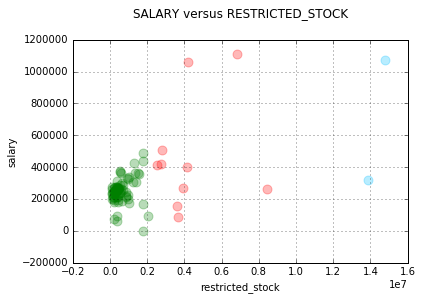

In [6]:
from sklearn.preprocessing import MinMaxScaler 

features_list = [poi, feature_3, feature_1]
data = featureFormat(data_dict, features_list, remove_any_zeroes=True)

_, finance_features = targetFeatureSplit( data )


### cluster here; create predictions of the cluster labels
### for the data and store them to a list called pred

from sklearn.cluster import KMeans
km = KMeans(n_clusters=3, n_init=100, max_iter=500)
km.fit(finance_features)
pred = km.predict(finance_features)

colors = ["g", "deepskyblue", "r", "m", "k"]

for i, point in enumerate(finance_features):
    x = point[0]
    y = point[1]
    ax = plt.scatter(x, y, color = colors[pred[i]], s=80, marker = 'o', alpha = 0.28)
    
plt.xlabel(features_list[1])
plt.ylabel(features_list[2])
plt.grid(True)
plt.title(features_list[2].upper()+' versus '+features_list[1].upper(), y=1.08)
plt.show()

## Feature Selection

In [26]:
feature_list = ['poi', 'salary', 'deferral_payments', 'total_payments', 'loan_advances', 
                'bonus', 'restricted_stock_deferred', 'deferred_income', 
                'total_stock_value', 'expenses', 'exercised_stock_options', 'other', 
                'long_term_incentive', 
                'restricted_stock', 'director_fees',
                'to_messages','from_poi_to_this_person', 'from_messages', 
                'from_this_person_to_poi', 'shared_receipt_with_poi'
               ]

names = ['salary', 'deferral_payments', 'total_payments', 'loan_advances', 'bonus', 
        'restricted_stock_deferred', 'deferred_income', 'total_stock_value', 'expenses', 
        'exercised_stock_options', 'other', 'long_term_incentive', 'restricted_stock', 
         'director_fees','to_messages', 'from_poi_to_this_person', 'from_messages', 
                'from_this_person_to_poi', 'shared_receipt_with_poi']

my_dataset = data_dict
data = featureFormat(my_dataset, feature_list
                     , sort_keys = True)
labels, features = targetFeatureSplit(data)


In [28]:
from sklearn.ensemble import RandomForestClassifier
import operator

def getImportantFeatures(rf, n=1, topNFeatures=5):
    featuresSortedByScore = list()

    for i in range(n):
        rf.fit(features, labels)
        featuresSortedByScore.append(sorted(zip(map(lambda x: round(x, 4), rf.feature_importances_), names), 
             reverse=True))

    myTopFeature = {}
    for i in range (len(featuresSortedByScore)):
        for j in range (topNFeatures):
            if featuresSortedByScore[i][j][1] not in myTopFeature.keys():
                myTopFeature[featuresSortedByScore[i][j][1]] = 1
            else:
                myTopFeature[featuresSortedByScore[i][j][1]] += 1


    return sorted(myTopFeature.items(), key=operator.itemgetter(1), reverse=True)[:topNFeatures]
    
    
def getImportantFeaturesLasso(rf, n=1, topNFeatures=5):
    featuresSortedByScore = list()

    for i in range(n):
        rf.fit(features, labels)
        featuresSortedByScore.append(sorted(zip(map(lambda x: round(x, 4), rf.scores_), names), 
             reverse=True))

    myTopFeature = {}
    for i in range (len(featuresSortedByScore)):
        for j in range (topNFeatures):
            if featuresSortedByScore[i][j][1] not in myTopFeature.keys():
                myTopFeature[featuresSortedByScore[i][j][1]] = 1
            else:
                myTopFeature[featuresSortedByScore[i][j][1]] += 1


    return sorted(myTopFeature.items(), key=operator.itemgetter(1), reverse=True)[:topNFeatures]

In [31]:
n =1000
topNFeatures = 10
clf = RandomForestClassifier()
theFeatures = getImportantFeatures(clf, n, topNFeatures)



('exercised_stock_options', 944)
('total_stock_value', 903)
('bonus', 886)
('expenses', 877)
('other', 875)
('total_payments', 709)
('restricted_stock', 684)
('deferred_income', 675)
('shared_receipt_with_poi', 674)
('salary', 633)


In [34]:
for item, score in theFeatures:
    print "{:30}{:4}".format(item, score)

exercised_stock_options        944
total_stock_value              903
bonus                          886
expenses                       877
other                          875
total_payments                 709
restricted_stock               684
deferred_income                675
shared_receipt_with_poi        674
salary                         633


In [35]:
feature_list = ['exercised_stock_options',
'total_stock_value',
'bonus',
'expenses',
'other',
'total_payments',
'restricted_stock',
'deferred_income',
'shared_receipt_with_poi',
'salary']

my_dataset = data_dict

data = featureFormat(my_dataset, feature_list
                     , sort_keys = True)
labels, features = targetFeatureSplit(data)